In [2]:
import kit
from kit import penguin_color
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style(style='whitegrid')
sns.set_context(context='notebook')
plt.rcParams['figure.figsize'] = (11, 9.4)
import palmerpenguins
pg = palmerpenguins.load_penguins().dropna()
import empiricaldist

## Distribuciones: PMFs, CDFs y PDFs

### Funciones de probabilidad de masas (PMFs)

Utilizando Seaborn

<Axes: xlabel='flipper_length_mm', ylabel='Probability'>

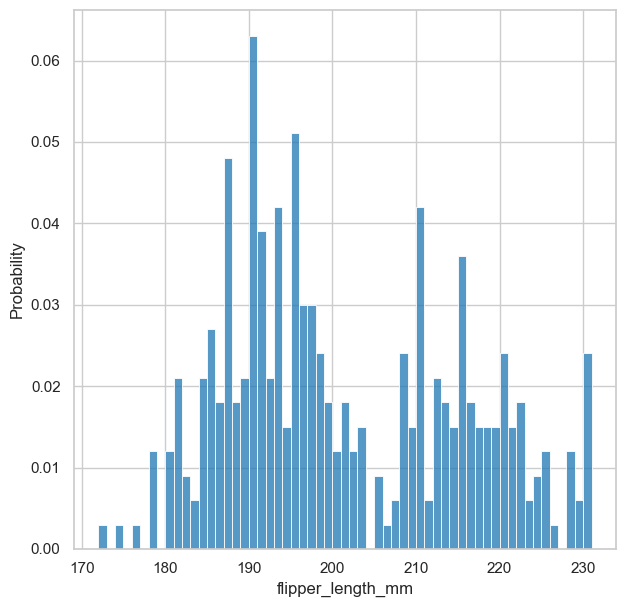

In [52]:
plt.figure(figsize=(7, 7))

sns.histplot(
    data= pg,
    x= 'flipper_length_mm',
    binwidth=1,
    stat='probability'
)

Utilizando empiricaldist

In [50]:


pmf_flmm = empiricaldist.Pmf.from_seq(
    pg.flipper_length_mm,
    normalize= True
)

<Figure size 700x700 with 0 Axes>

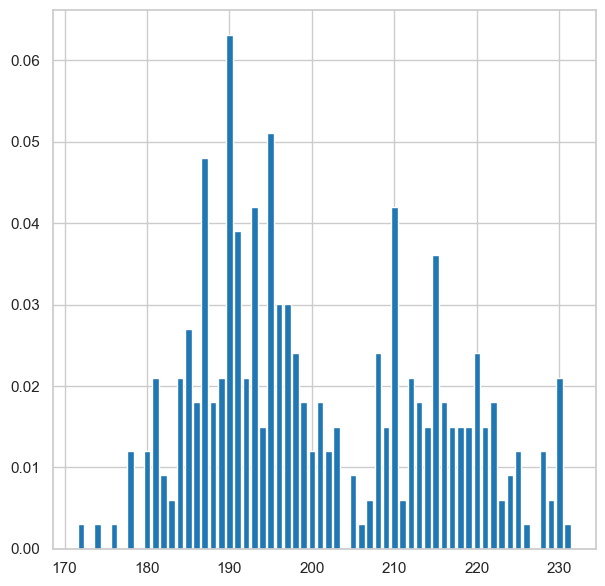

In [51]:
plt.figure(figsize=(7, 7))

pmf_flmm.bar()

In [13]:
pmf_flmm(190)

0.06306306306306306

In [14]:
pg.flipper_length_mm.max()

231.0

### Funciones empíricas de probabilidad acumulada (ECDFs)

Utilizando seaborn

<Axes: xlabel='flipper_length_mm', ylabel='Proportion'>

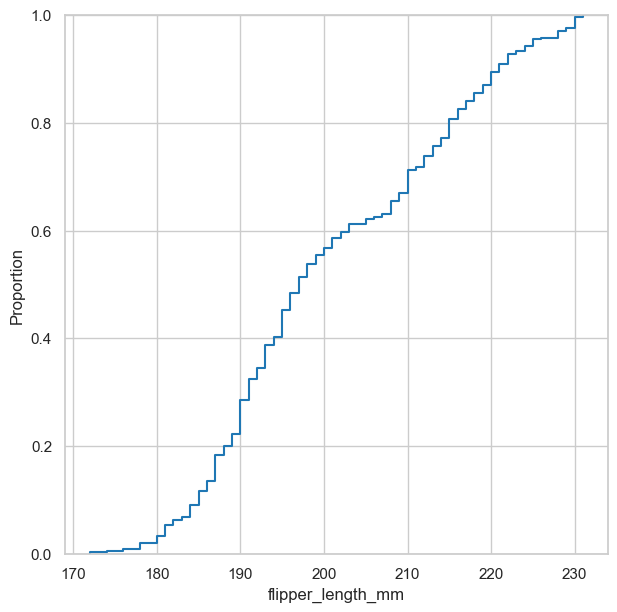

In [49]:
plt.figure(figsize=(7, 7))

sns.ecdfplot(
    data= pg,
    x= 'flipper_length_mm'
)

Utilizando empiricaldist

In [17]:
cdf_flmm = empiricaldist.Cdf.from_seq(
    pg.flipper_length_mm,
    normalize= True
)

200 0.5675675675675675


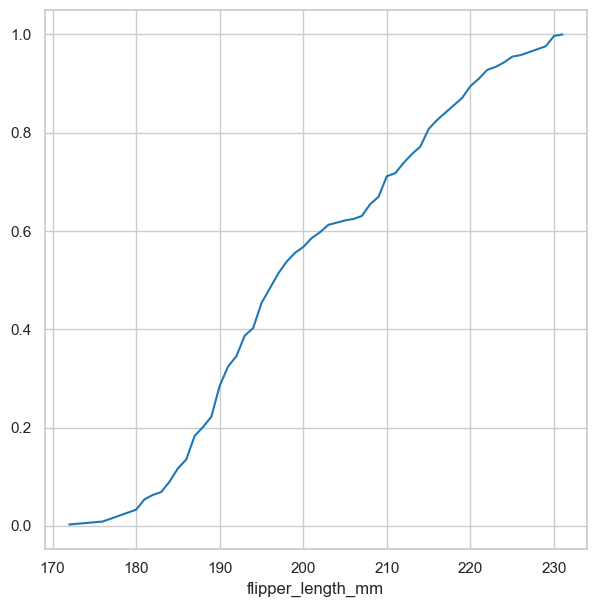

In [48]:
plt.figure(figsize=(7, 7))

cdf_flmm.plot()

q = 200
p = cdf_flmm.forward(q)
print(q, p)

200 0.5675675675675675


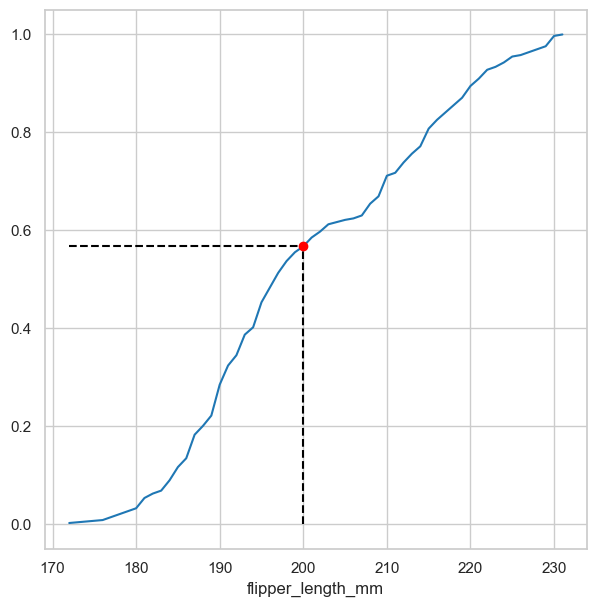

In [47]:
plt.figure(figsize=(7, 7))

cdf_flmm.plot()

q = 200
p = cdf_flmm.forward(q)
print(q, p)

plt.vlines(
    x= q,
    ymin= 0,
    ymax= p,
    color= 'black',
    linestyle= 'dashed'
)

plt.hlines(
    y= p,
    xmin= pg['flipper_length_mm'].min(),
    # xmin= pmf_flmm.qs[0],
    xmax= q,
    color= 'black',
    linestyle= 'dashed'
)

plt.plot(q, p, 'ro')

plt.show()

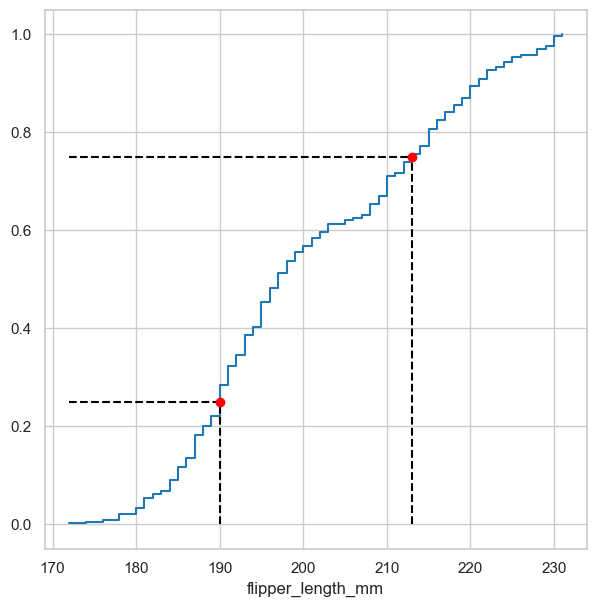

In [46]:
plt.figure(figsize=(7, 7))
cdf_flmm.step()


p_1 = 0.25
p_2 = 0.75

ps = (0.25, 0.75)
qs = cdf_flmm.inverse(ps)

plt.vlines(
    x = qs,
    ymin= 0,
    ymax= ps,
    color= 'black',
    linestyle= 'dashed'
)

plt.hlines(
    y= ps,
    xmin= pg['flipper_length_mm'].min(),
    xmax= qs,
    color= 'black',
    linestyle= 'dashed'
)

plt.scatter(
    x= qs,
    y= ps,
    color= 'red',
    zorder= 2
)

Comparando distribuciones

<Axes: xlabel='flipper_length_mm', ylabel='Proportion'>

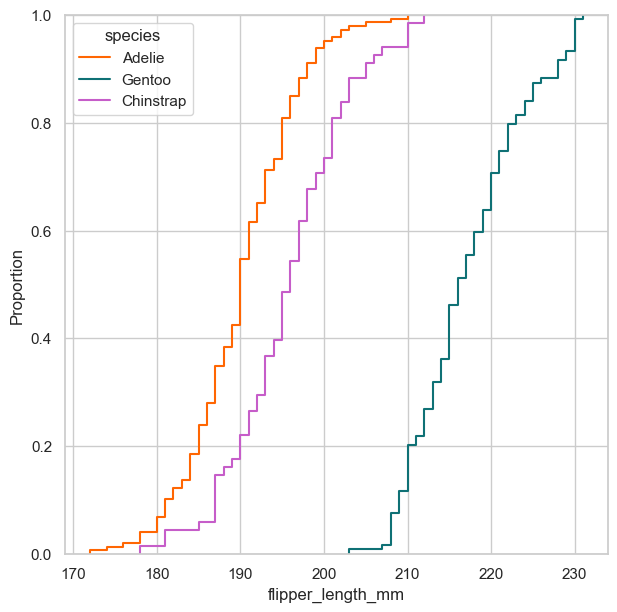

In [44]:
plt.figure(figsize= (7, 7))

sns.ecdfplot(
    data= pg,
    x= 'flipper_length_mm',
    hue= 'species',
    palette= penguin_color
)